In [2]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('credit.csv')

In [14]:
df.columns



Index(['checking_balance', 'months_loan_duration', 'credit_history', 'purpose',
       'amount', 'savings_balance', 'employment_duration', 'percent_of_income',
       'years_at_residence', 'age', 'other_credit', 'housing',
       'existing_loans_count', 'job', 'dependents', 'phone', 'default'],
      dtype='object')

In [5]:
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [4]:
df.describe()

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


### Identify numerical and categorical variables



In [3]:

# Identify numerical and categorical variables
numerical_vars = df.select_dtypes(include='number').columns.tolist()
categorical_vars = df.select_dtypes(include='object').columns.tolist()

print("Numerical Variables:")
print(numerical_vars)
print("\nCategorical Variables:")
print(categorical_vars)

Numerical Variables:
['months_loan_duration', 'amount', 'percent_of_income', 'years_at_residence', 'age', 'existing_loans_count', 'dependents']

Categorical Variables:
['checking_balance', 'credit_history', 'purpose', 'savings_balance', 'employment_duration', 'other_credit', 'housing', 'job', 'phone', 'default']


In [8]:

# Unique values in categorical columns
print("\nUnique values in categorical columns:")
for column in df.select_dtypes(include='object').columns:
    unique_values = df[column].unique()
    print(f"{column}:")
    for value in unique_values:
        print(f"  - {value}")


Unique values in categorical columns:
checking_balance:
  - < 0 DM
  - 1 - 200 DM
  - unknown
  - > 200 DM
credit_history:
  - critical
  - good
  - poor
  - perfect
  - very good
purpose:
  - furniture/appliances
  - education
  - car
  - business
  - renovations
  - car0
savings_balance:
  - unknown
  - < 100 DM
  - 500 - 1000 DM
  - > 1000 DM
  - 100 - 500 DM
employment_duration:
  - > 7 years
  - 1 - 4 years
  - 4 - 7 years
  - unemployed
  - < 1 year
other_credit:
  - none
  - bank
  - store
housing:
  - own
  - other
  - rent
job:
  - skilled
  - unskilled
  - management
  - unemployed
phone:
  - yes
  - no
default:
  - no
  - yes


#### Numerical columns distribution

/home/abhishek/anaconda3/envs/test/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/abhishek/anaconda3/envs/test/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/abhishek/anaconda3/envs/test/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/abhishek/anaconda3/envs/test/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated

IndexError: index 2 is out of bounds for axis 0 with size 2

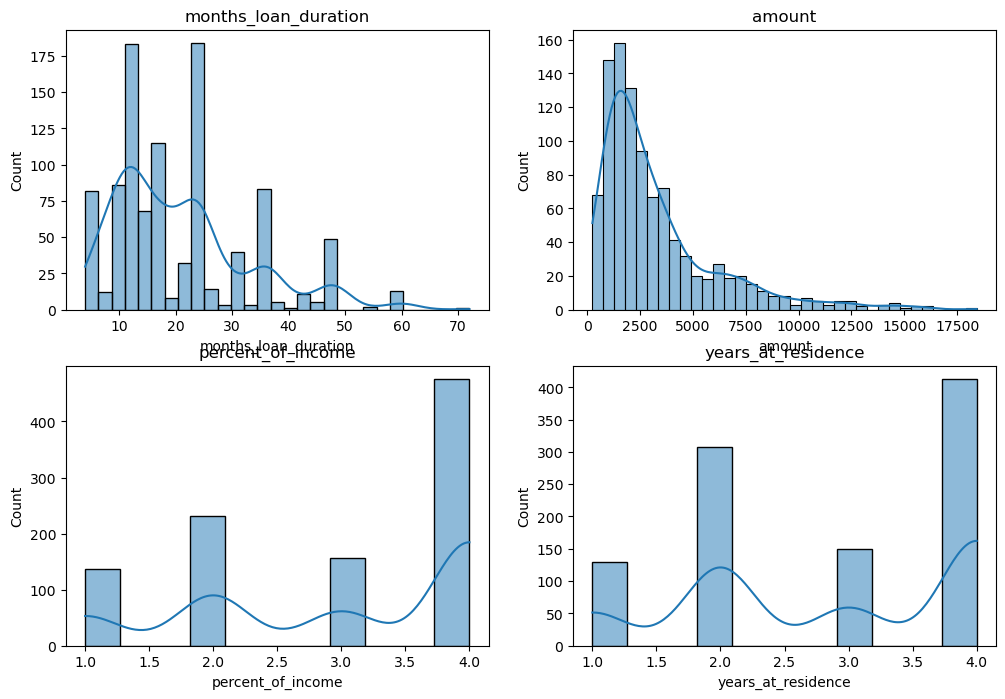

In [9]:

# Distribution of numerical columns
import matplotlib.pyplot as plt
import seaborn as sns

# Set up figure and axes
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Histograms of numerical columns
for i, column in enumerate(df.select_dtypes(include='number').columns):
    sns.histplot(df[column], ax=axes[i//2, i%2], kde=True)
    axes[i//2, i%2].set_title(column)

plt.tight_layout()
plt.show()


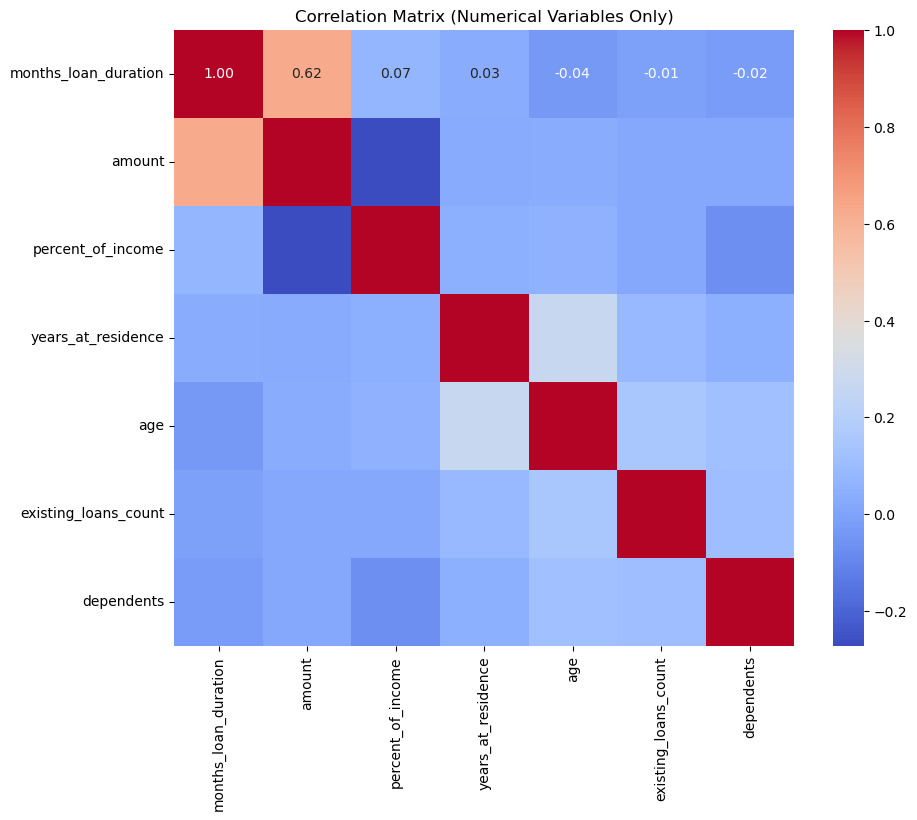

In [12]:

# Select only numerical variables
numerical_df = df.select_dtypes(include='number')

# Calculate correlation matrix
correlation_matrix = numerical_df.corr()

# Plot correlation matrix using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Numerical Variables Only)')
plt.show()

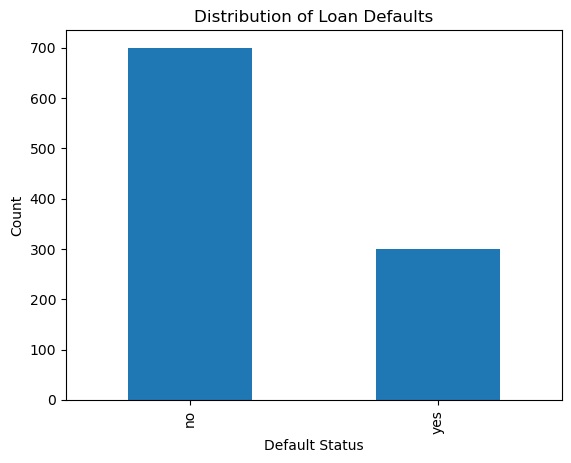

In [16]:
data = df
# Analyze target variable - 'default' (distribution of defaults)
data['default'].value_counts().plot(kind='bar')
plt.title("Distribution of Loan Defaults")
plt.xlabel("Default Status")
plt.ylabel("Count")
plt.show()

In [20]:

# Check for missing values
data.isnull().sum()

checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_duration     0
percent_of_income       0
years_at_residence      0
age                     0
other_credit            0
housing                 0
existing_loans_count    0
job                     0
dependents              0
phone                   0
default                 0
dtype: int64

In [19]:

# Explore questions based on initial observations:
#  - How does loan amount relate to loan default rates?
loan_amounts_by_default = data.groupby('default')['amount']
loan_amounts_by_default.describe()


,count,mean,std,min,25%,50%,75%,max
default,,,,,,,,
no,700.0,2985.457143,2401.472278,250.0,1375.5,2244.0,3634.75,15857.0
yes,300.0,3938.126667,3535.818955,433.0,1352.5,2574.5,5141.50,18424.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


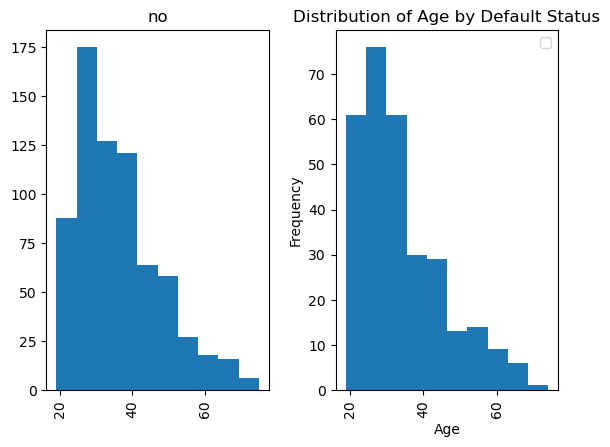

In [22]:

#  - How does age distribution differ between those who default and don't?
data.groupby('default')['age'].describe()


# Histograms to compare age distribution between defaulters and non-defaulters
data.hist(column='age', by='default')
plt.title("Distribution of Age by Default Status")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.legend()
plt.show()


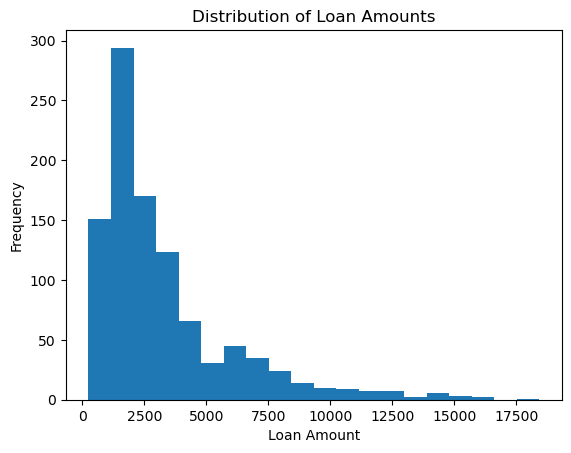

In [24]:
# Visualize distribution of loan amount (all applicants)
plt.hist(data['amount'], bins=20)
plt.title("Distribution of Loan Amounts")
plt.xlabel("Loan Amount")
plt.ylabel("Frequency")
plt.show()

/tmp/ipykernel_780292/2931265209.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  loan_amount_counts = data.groupby(pd.cut(data['amount'], bins=bins))['default'].value_counts().unstack(fill_value=0)


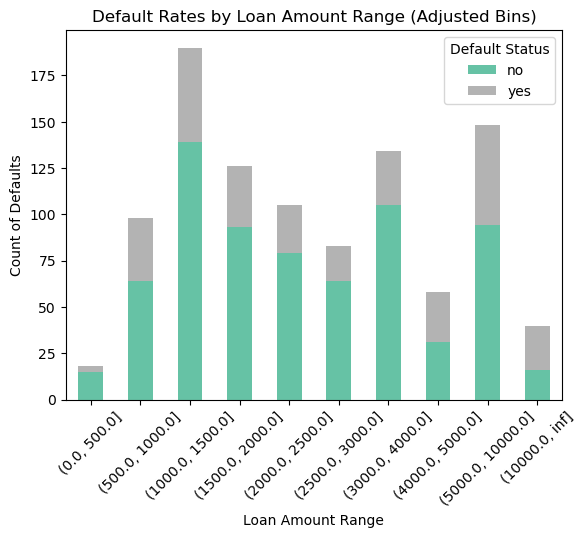

In [27]:
# Create bins for loan amount categories with more bins for lower amounts
bins = [0, 500, 1000, 1500, 2000, 2500, 3000, 4000, 5000, 10000, float('inf')]
labels = ['0-500', '500-1000', '1000-1500', '1500-2000', '2000-2500', '2500-3000', '3000-4000', '4000-5000', '5000-10000', '10000+']

# Count defaults within each loan amount range
loan_amount_counts = data.groupby(pd.cut(data['amount'], bins=bins))['default'].value_counts().unstack(fill_value=0)

# Plot stacked bar chart
loan_amount_counts.plot(kind='bar', stacked=True, colormap='Set2')
plt.title("Default Rates by Loan Amount Range (Adjusted Bins)")
plt.xlabel("Loan Amount Range")
plt.ylabel("Count of Defaults")
plt.xticks(rotation=45)
plt.legend(title="Default Status")
plt.show()